In [24]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import numpy as np
import matplotlib.pyplot as plt
import random

In [25]:
dataset = [
    ['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
    ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
    ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
    ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
    ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']
]

oht = TransactionEncoder()
oht_ary = oht.fit(dataset).transform(dataset)
df = pd.DataFrame(oht_ary, columns=oht.columns_)         
 
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
 
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)
print (rules)


             antecedents            consequents  antecedent support  \
0                 (Eggs)                (Onion)                 0.8   
1                (Onion)                 (Eggs)                 0.6   
2   (Eggs, Kidney Beans)                (Onion)                 0.8   
3  (Onion, Kidney Beans)                 (Eggs)                 0.6   
4                 (Eggs)  (Onion, Kidney Beans)                 0.8   
5                (Onion)   (Eggs, Kidney Beans)                 0.6   

   consequent support  support  confidence  lift  leverage  conviction  \
0                 0.6      0.6        0.75  1.25      0.12         1.6   
1                 0.8      0.6        1.00  1.25      0.12         inf   
2                 0.6      0.6        0.75  1.25      0.12         1.6   
3                 0.8      0.6        1.00  1.25      0.12         inf   
4                 0.6      0.6        0.75  1.25      0.12         1.6   
5                 0.8      0.6        1.00  1.25      0.12

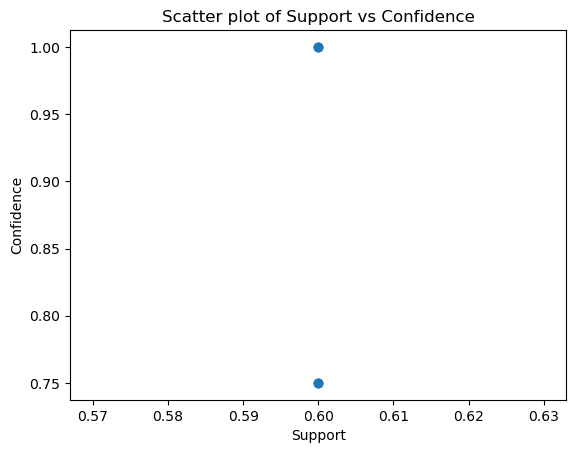

In [26]:
# Utilisez .values pour extraire les valeurs des colonnes "support" et "confidence"
support = rules['support'].values
confidence = rules['confidence'].values
plt.scatter(support, confidence)
plt.title('Scatter plot of Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

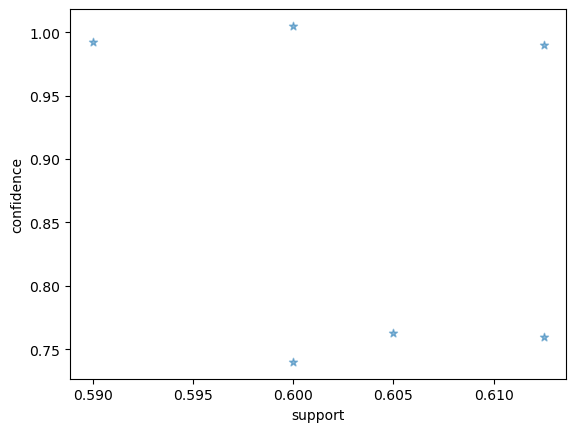

In [27]:
for i in range (len(support)):
   support[i] = support[i] + 0.0025 * (random.randint(1,10) - 5) 
   confidence[i] = confidence[i] + 0.0025 * (random.randint(1,10) - 5)

plt.scatter(support, confidence,   alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

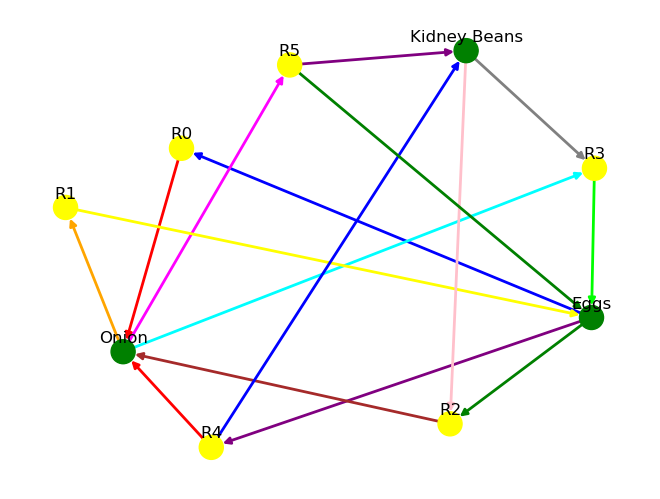

In [28]:
import networkx as nx

def draw_graph(association_rules, rules):
    G1 = nx.DiGraph()
    color_map = []
    N = 50
    colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'brown', 'pink', 'grey', 'lime']
    strs = ['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']

    for i in range(len(association_rules)):
        G1.add_nodes_from(["R" + str(i)])

        for a in association_rules.iloc[i]['antecedents']:
            G1.add_nodes_from([a])
            G1.add_edge(a, "R" + str(i), color=colors[i], weight=2)

        for c in association_rules.iloc[i]['consequents']:
            G1.add_nodes_from([c])
            G1.add_edge("R" + str(i), c, color=colors[i], weight=2)

    for node in G1:
        found_a_string = False
        for item in strs:
            if node == item:
                found_a_string = True
        if found_a_string:
            color_map.append('yellow')
        else:
            color_map.append('green')

    weights = [G1[u][v]['weight'] for u, v in G1.edges()]

    pos = nx.spring_layout(G1, k=16, scale=1)
    nx.draw(G1, pos, node_color=color_map, edge_color=colors, width=weights, font_size=16, with_labels=False)

    for p in pos:
        pos[p][1] += 0.07
    nx.draw_networkx_labels(G1, pos)
    plt.show()

draw_graph(rules, 6)


In [29]:
 df = pd.read_excel('http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx')
 
 
df['Description'] = df['Description'].str.strip()
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df = df[~df['InvoiceNo'].str.contains('C')]
 
basket = (df[df['Country'] =="France"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))
 
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
 
basket_sets = basket.applymap(encode_units)
basket_sets.drop('POSTAGE', inplace=True, axis=1)
 
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)
 
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()
 
print (rules)
 
 
 
support=rules['support'].vaz
confidence=rules.as_matrix(columns=['confidence'])
 
import seaborn as sns1
 
for i in range (len(support)):
    support[i] = support[i] 
    confidence[i] = confidence[i] 
     
plt.title('Association Rules')
plt.xlabel('support')
plt.ylabel('confidence')    
sns1.regplot(x=support, y=confidence, fit_reg=False)
 
plt.gcf().clear()
draw_graph (rules, 10) 

C:\Users\chikr\AppData\Local\Temp\ipykernel_4100\2134397889.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_sets = basket.applymap(encode_units)


                                          antecedents  \
0                        (ALARM CLOCK BAKELIKE GREEN)   
1                         (ALARM CLOCK BAKELIKE PINK)   
2                          (ALARM CLOCK BAKELIKE RED)   
3                        (ALARM CLOCK BAKELIKE GREEN)   
4                          (ALARM CLOCK BAKELIKE RED)   
5                         (ALARM CLOCK BAKELIKE PINK)   
6                                (SPACEBOY LUNCH BOX)   
7                              (DOLLY GIRL LUNCH BOX)   
8                     (PLASTERS IN TIN CIRCUS PARADE)   
9                          (PLASTERS IN TIN SPACEBOY)   
10                 (PLASTERS IN TIN WOODLAND ANIMALS)   
11                    (PLASTERS IN TIN CIRCUS PARADE)   
12                 (PLASTERS IN TIN WOODLAND ANIMALS)   
13                         (PLASTERS IN TIN SPACEBOY)   
14               (SET/20 RED RETROSPOT PAPER NAPKINS)   
15                      (SET/6 RED SPOTTY PAPER CUPS)   
16               (SET/20 RED RE

C:\Users\chikr\anaconda3\envs\apriori\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


AttributeError: 'Series' object has no attribute 'vaz'